In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [ ]:
# Load the dataset
df = pd.read_csv('/content/wine.csv')
df


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
df.tail()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [ ]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


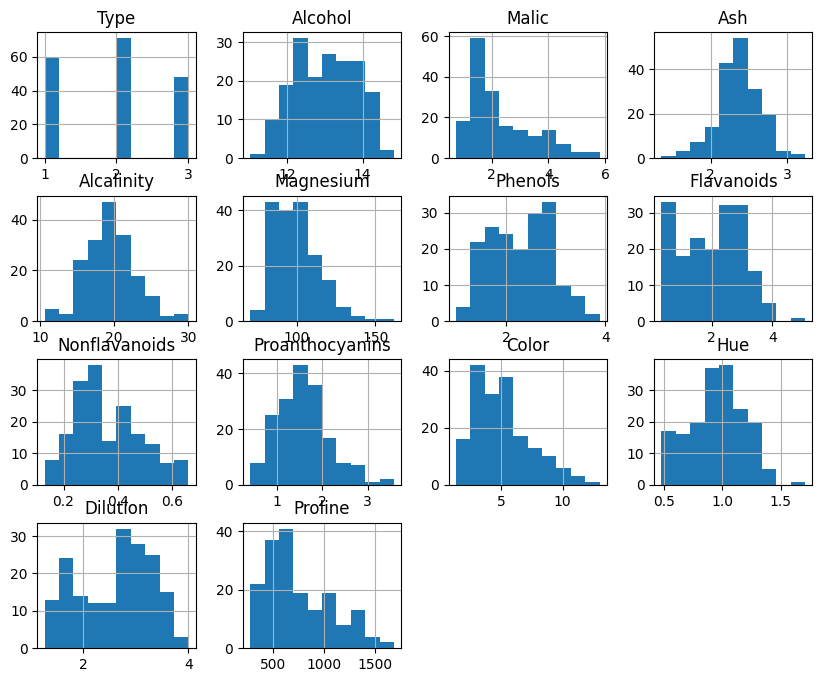

In [ ]:
#Examine the distribution of features using histograms, box plots, or density plots
#visualisation
# Histograms
df.hist(figsize=(10, 8))
plt.show()


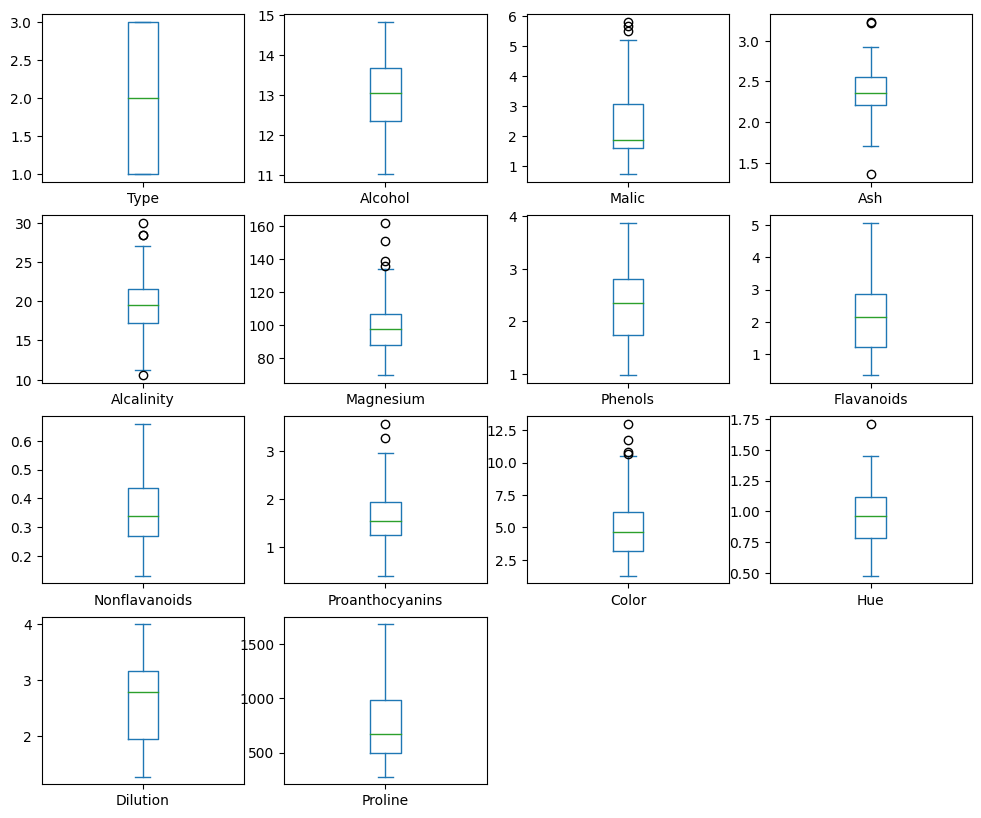

In [ ]:
# Box plots
df.plot(kind='box', subplots=True, layout=(4, 4), figsize=(12, 10))
plt.show()


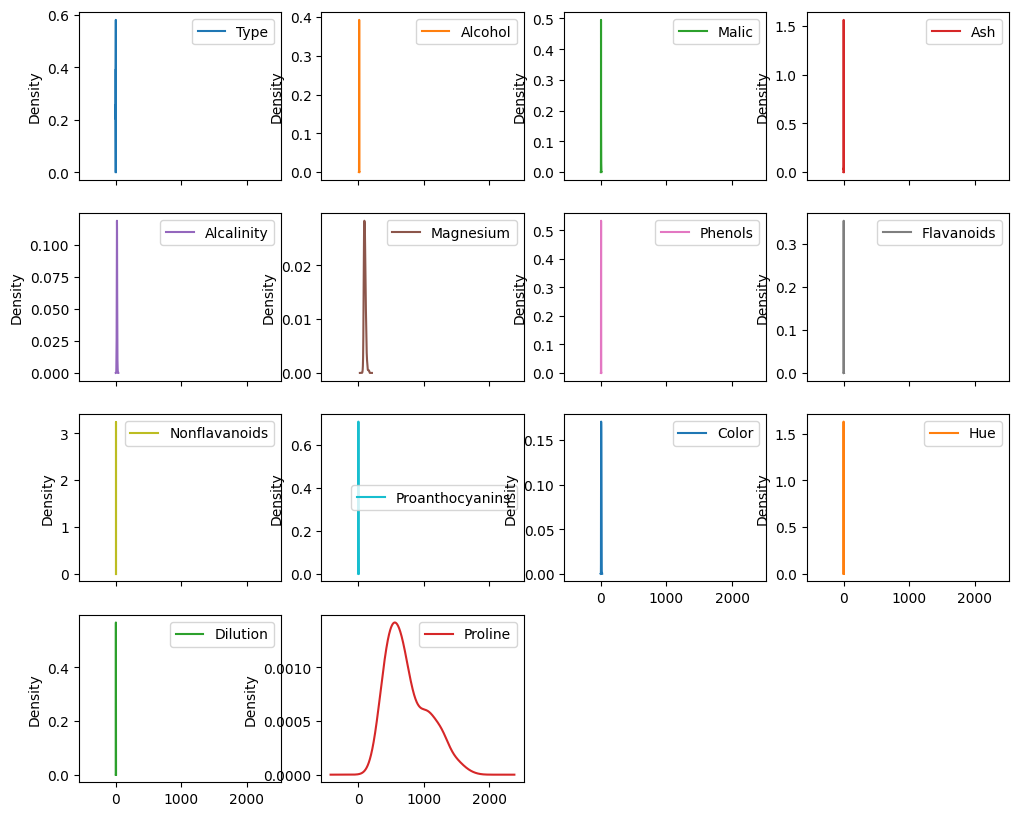

In [ ]:
# Density plots
df.plot(kind='density', subplots=True, layout=(4, 4), figsize=(12, 10))
plt.show()

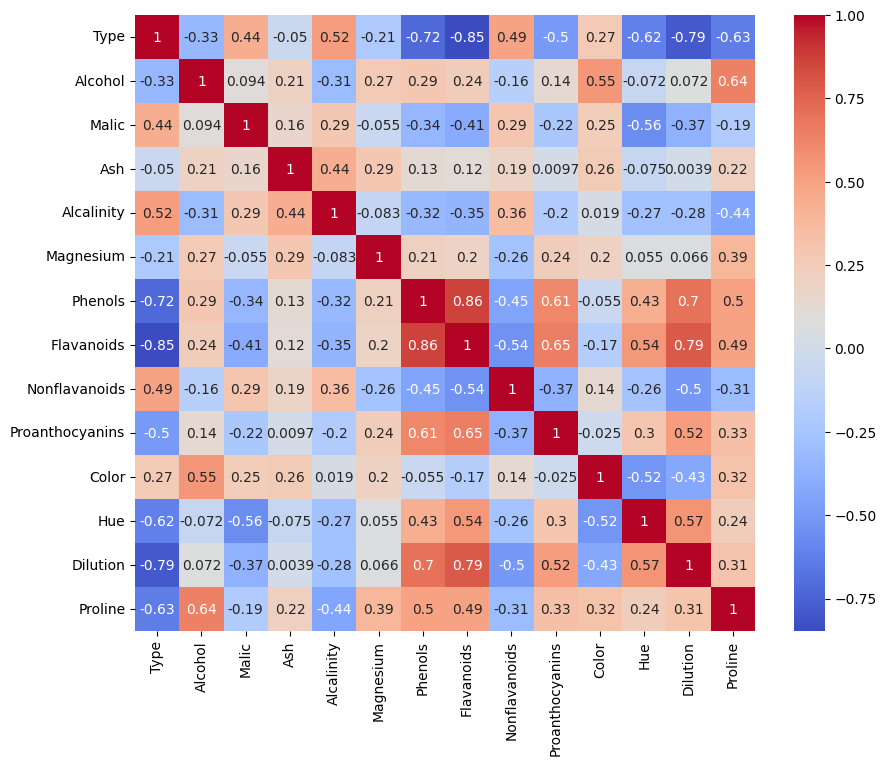

In [ ]:
#Investigate correlations between features
# Correlation matrix
corr_matrix = df.corr()

# Heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [ ]:
#Task 2: Dimensionality Reduction with PCA

In [ ]:
#1. Standardize the features
from sklearn.preprocessing import StandardScaler

# Standardizing the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


In [ ]:
#2. Implement PCA to reduce the dimensionality of the dataset
from sklearn.decomposition import PCA

# PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_data)


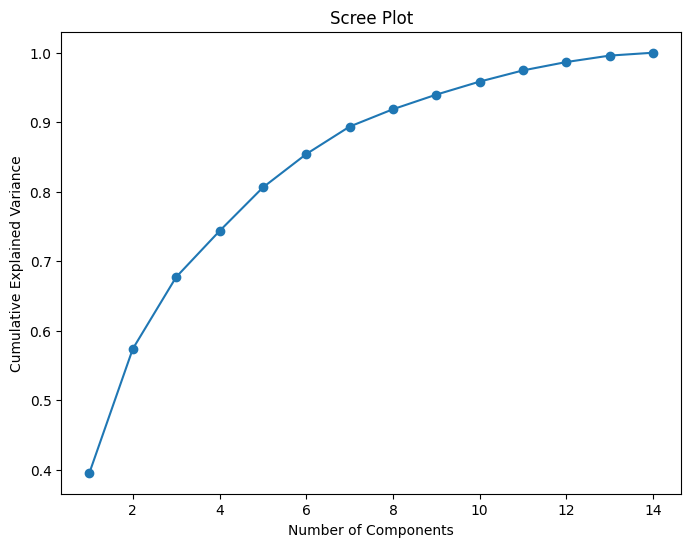

In [ ]:
#3. Determine the optimal number of principal components
# Scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()


In [ ]:
#4. Transform the original dataset into the principal components
# Choosing the number of components
pca = PCA(n_components=2)  # Example: 2 components
pca_transformed = pca.fit_transform(scaled_data)


In [ ]:
#Task 3: Clustering with Original Data

In [ ]:
#1. Apply a clustering algorithm (e.g., K-means) to the original dataset
from sklearn.cluster import KMeans

# K-Means clustering
kmeans = KMeans(n_clusters=3)  # Example: 3 clusters
original_clusters = kmeans.fit_predict(scaled_data)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


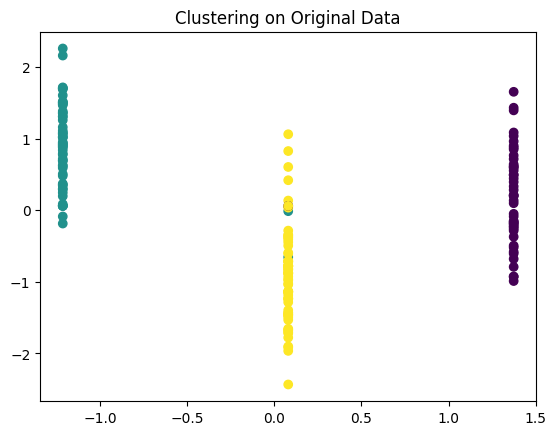

In [ ]:
#2. Visualize the clustering results
# Visualize original data clusters
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=original_clusters, cmap='viridis')
plt.title('Clustering on Original Data')
plt.show()


In [ ]:
#3. Evaluate clustering performance
# Silhouette score
original_silhouette = silhouette_score(scaled_data, original_clusters)
print(f'Silhouette Score (Original Data): {original_silhouette}')


Silhouette Score (Original Data): 0.30773604383565206


In [ ]:
#Task 4: Clustering with PCA Data

In [ ]:
#1. Apply the same clustering algorithm to the PCA-transformed dataset
# K-Means clustering on PCA data
pca_clusters = kmeans.fit_predict(pca_transformed)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


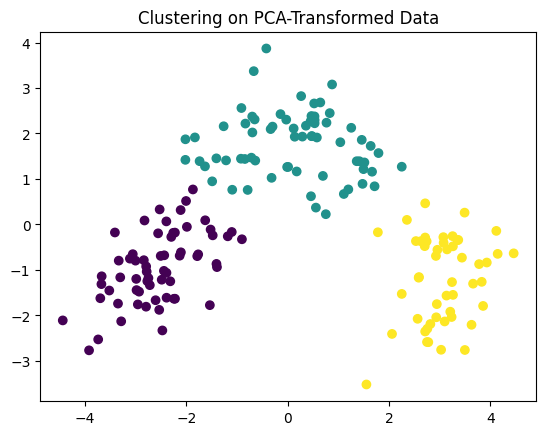

In [ ]:
#2. Visualize the clustering results
# Visualize PCA data clusters
plt.scatter(pca_transformed[:, 0], pca_transformed[:, 1], c=pca_clusters, cmap='viridis')
plt.title('Clustering on PCA-Transformed Data')
plt.show()

In [ ]:
#3. Compare the clustering results
# Silhouette score for PCA data
pca_silhouette = silhouette_score(pca_transformed, pca_clusters)
print(f'Silhouette Score (PCA Data): {pca_silhouette}')


Silhouette Score (PCA Data): 0.6024415520362844


In [ ]:
CONCLUSION AND INSIGHTS FROM THE PROJECT

In [ ]:
1.Key Findings and Insights (Summary):
   - PCA Analysis:Dimensionality reduction with PCA condensed the wine data into 2 principal components, which explained 55.4% of the total variance.
   - Clustering Results:KMeans clustering identified 3 distinct clusters, suggesting the presence of different wine types or qualities.
   - Visualization:The PCA-reduced data visualization clearly shows well-separated clusters, indicating effective grouping in the reduced dimensionality space.

These findings highlight the effectiveness of PCA and KMeans in revealing the underlying structure and distinguishing characteristics of the wine dataset.

In [ ]:
2. Practical Implications of PCA and Clustering:

- Principal Component Analysis (PCA):
  - Dimensionality Reduction:PCA simplifies high-dimensional datasets by reducing the number of features while retaining the most significant variance. This makes the data easier to visualize and analyze.
  - Computational Efficiency:By lowering the dimensionality, PCA reduces computational complexity and resource usage, speeding up model training and improving performance.

- Clustering (e.g., KMeans):
  -Pattern Discovery:Clustering techniques group data into distinct clusters based on similarity, allowing for the identification of patterns and structures without predefined categories.
  -Insight Generation:By grouping similar data points, clustering can reveal hidden structures and relationships within the data, which can be valuable for making data-driven decisions and understanding underlying trends.

Overall, PCA and clustering are powerful tools for simplifying and interpreting complex datasets, enabling more effective data exploration and decision-making.

In [ ]:
3. Recommendations:

- Use PCA:
  - When dealing with high-dimensional data to reduce complexity and improve visualization.
  - To handle datasets with many correlated features, simplifying analysis while preserving key information.

- Use Clustering:
  - To identify natural groupings or patterns in data without predefined labels.
  - For tasks such as categorizing items (e.g., wines) or segmenting markets to discover distinct groups and trends.